In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import datetime as dt
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
# load all csv files into respective dataframes

FR_target_pt1_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\DFEDTARU_pt1.csv')
FR_target_pt2_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\DFEDTAR_pt2.csv')

FF_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\FF.csv')









In [8]:
BTC_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\BTC-USD (3).csv')

AUD_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\AUDUSD=X.csv')
EUR_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\csv')
GBP_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\GBPUSD=X.csv')
JPY_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\JPY=X.csv')


DGS10_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\DGS10 (3).csv')
DTB3_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\DTB3 (1).csv')

USEP_df = pd.read_csv(r'..\\Project_2_BTC_Price_Modeling\csv_files\USEPUINDXD.csv')
GEP_df = pd.read_csv('..\\Project_2_BTC_Price_Modeling\csv_files\GEPUCURRENT.csv')

FileNotFoundError: [Errno 2] No such file or directory: '..\\Project_2_BTC_Price_Modeling\\csv_files\\AUDUSD=X.csv'

In [44]:
FF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    1045 non-null   object 
 1   FF_CHG  1045 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.5+ KB


In [7]:
FF_df['DATE'] = pd.to_datetime(FF_df['DATE'])
FF_df = FF_df.rename(columns={"DATE":"Date"})


KeyError: 'DATE'

In [9]:
FF_df.head()

,Date,FF_CHG
0,2004-09-01,0.02
1,2004-09-08,-0.03
2,2004-09-15,-0.01
3,2004-09-22,0.15
4,2004-09-29,0.12


In [4]:
BTC_close_df = BTC_df.drop('Open',axis=1)

<Axes: >

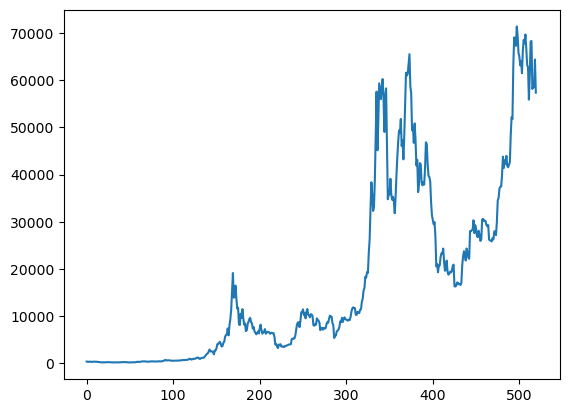

In [5]:
FF_df['Close'].plot(x='Date')

In [10]:
FF_df.columns = ['ds','y']


In [11]:
display(FF_df.shape)
display(FF_df.head(10))
display(FF_df.tail(10))

(1045, 2)

,ds,y
0,2004-09-01,0.02
1,2004-09-08,-0.03
2,2004-09-15,-0.01
3,2004-09-22,0.15
4,2004-09-29,0.12
5,2004-10-06,0.06
6,2004-10-13,-0.09
7,2004-10-20,0.03
8,2004-10-27,-0.02
9,2004-11-03,0.04


,ds,y
1035,2024-07-03,0.0
1036,2024-07-10,0.0
1037,2024-07-17,0.0
1038,2024-07-24,0.0
1039,2024-07-31,0.0
1040,2024-08-07,0.0
1041,2024-08-14,0.0
1042,2024-08-21,0.0
1043,2024-08-28,0.0
1044,2024-09-04,0.0


In [12]:
#check na values

FF_df.isna().value_counts()

ds     y    
False  False    1045
Name: count, dtype: int64

In [9]:
#only one, so fill that na value with that date's closing price
BTC_close_df['y'] = BTC_close_df['y'].fillna(59112.480000)
display(BTC_close_df.tail(10))


,ds,y
512,2024-07-08,60787.792969
513,2024-07-15,68154.523438
514,2024-07-22,68255.867188
515,2024-07-29,58116.976563
516,2024-08-05,58719.484375
517,2024-08-12,58483.964844
518,2024-08-19,64333.542969
519,2024-08-26,57325.488281
520,2024-09-02,59112.480000
521,2024-09-03,59089.375000


<Axes: >

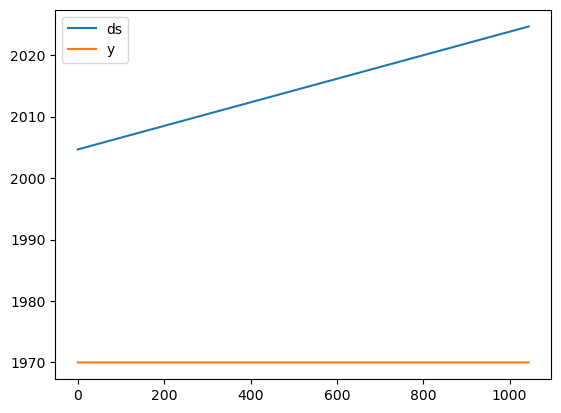

In [13]:
FF_df.plot()

In [14]:
#Instantiate a Prophet model

model = Prophet()
model

In [15]:
#Fit the prophet model to BTC_close_df

model.fit(FF_df)

06:32:55 - cmdstanpy - INFO - Chain [1] start processing
06:32:55 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as  52 weeeks (1 year)
future_trends = model.make_future_dataframe(periods=52, freq="W")

# View the last five rows of the predictions
future_trends.tail()

,ds
1092,2025-08-03
1093,2025-08-10
1094,2025-08-17
1095,2025-08-24
1096,2025-08-31


In [17]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-09-01,0.019934,-0.098263,0.132844,0.019934,0.019934,-0.001612,-0.001612,-0.001612,-0.001612,-0.001612,-0.001612,0.0,0.0,0.0,0.018323
1,2004-09-08,0.019781,-0.100260,0.138157,0.019781,0.019781,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.0,0.0,0.0,0.019865
2,2004-09-15,0.019628,-0.095063,0.128584,0.019628,0.019628,-0.001551,-0.001551,-0.001551,-0.001551,-0.001551,-0.001551,0.0,0.0,0.0,0.018077
3,2004-09-22,0.019475,-0.102401,0.133909,0.019475,0.019475,-0.001422,-0.001422,-0.001422,-0.001422,-0.001422,-0.001422,0.0,0.0,0.0,0.018054
4,2004-09-29,0.019322,-0.095369,0.139465,0.019322,0.019322,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597,0.0,0.0,0.0,0.019920


c:\Users\dyllan\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dyllan\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


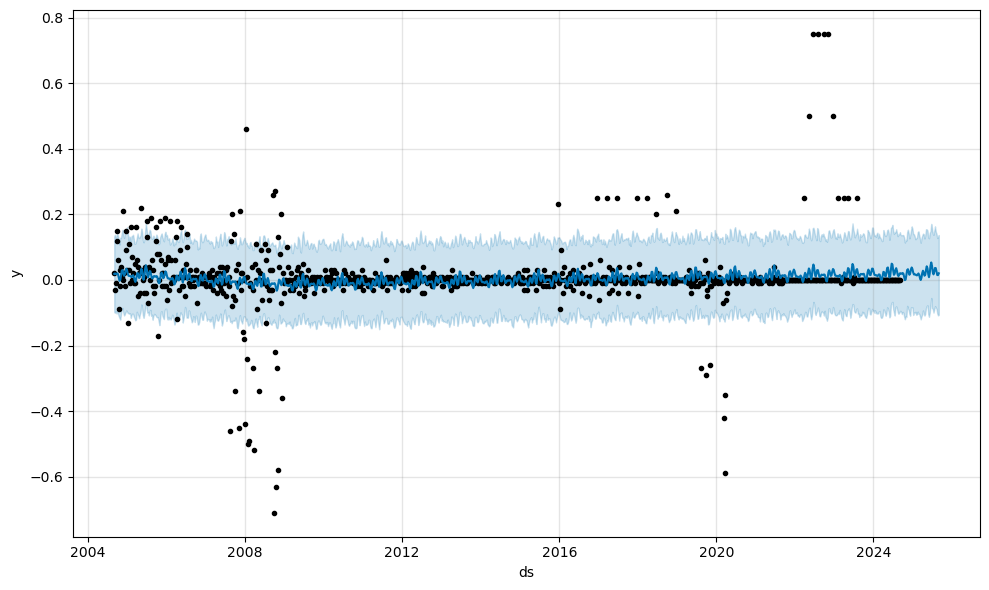

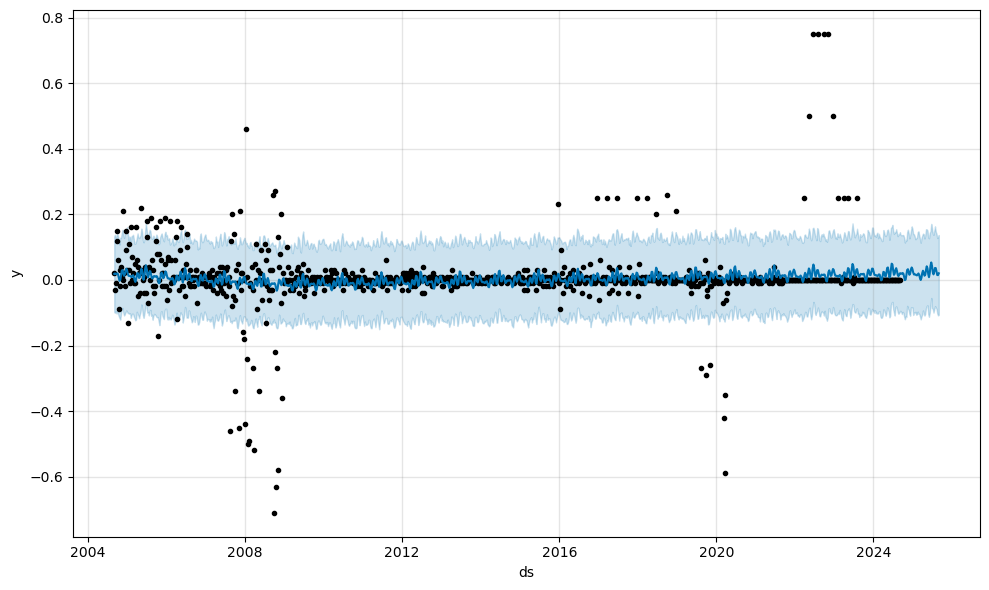

In [18]:
model.plot(forecast_trends)

c:\Users\dyllan\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dyllan\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\dyllan\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

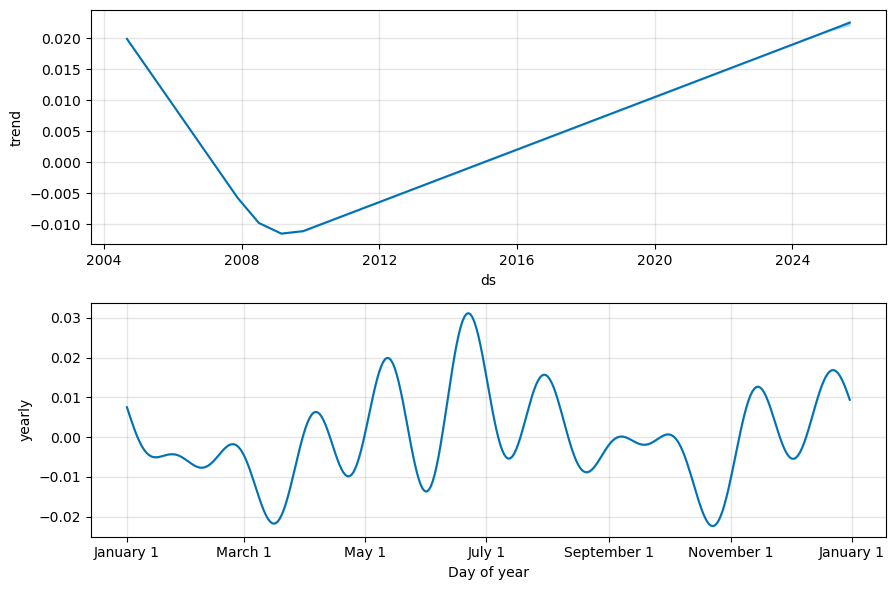

In [19]:
figures = model.plot_components(forecast_trends)

In [21]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends = forecast_trends.set_index(["ds"])
forecast_trends.head()

KeyError: "None of ['ds'] are in the columns"

<Axes: xlabel='ds'>

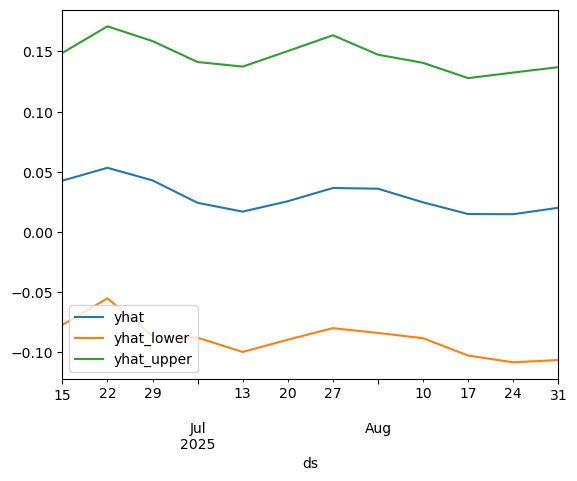

In [22]:
# From the `forecast_trends` DataFrame, plot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 12 weeks  
forecast_trends[["yhat", "yhat_lower", "yhat_upper"]].iloc[-12:, :].plot()

In [23]:
forecast_Nov_2024 = forecast_trends.loc["2024-11-01":"2024-11-30"][["yhat_upper", "yhat_lower", "yhat"]]

# Replace the column names to something less technical sounding
forecast_Nov_2024 = forecast_Nov_2024.rename(
    columns={
        "yhat_upper": "Best Case",
        "yhat_lower": "Worst Case", 
        "yhat": "Most Likely Case"
    }
)

# Review the last five rows of the DataFrame
forecast_Nov_2024.tail()

,Best Case,Worst Case,Most Likely Case
ds,,,
2024-11-03,0.119751,-0.112978,0.015600
2024-11-10,0.146384,-0.079189,0.030363
2024-11-17,0.153180,-0.087247,0.032625
2024-11-24,0.142428,-0.091589,0.023301


In [24]:
forecast_Nov_2024.mean()

Best Case           0.140436
Worst Case         -0.092751
Most Likely Case    0.025472
dtype: float64

In [21]:
#Create a return rate column, and another column that encodes for positive (1) and negative returns (0) rename to specify BTC data
BTC_df['Close'] = BTC_df['Close'].fillna(59112.480000)
BTC_df['Open'] = BTC_df['Open'].fillna(57326.970000)

BTC_df['BTC Return Rate'] = (BTC_df['Close'] - BTC_df['Open']) / BTC_df['Open']

BTC_df['BTC Return Class'] = BTC_df['BTC Return Rate'].apply(lambda x: 1 if x > 0 else 0)

#convert date column to date time
BTC_df['Date'] = pd.to_datetime(BTC_df['Date'])



#rename to specify BTC data

BTC_rename_df = BTC_df.rename(columns={'Open':'BTC Open','Close':'BTC Close'})

BTC_rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              522 non-null    datetime64[ns]
 1   BTC Open          522 non-null    float64       
 2   BTC Close         522 non-null    float64       
 3   BTC Return Rate   522 non-null    float64       
 4   BTC Return Class  522 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 20.5 KB


In [22]:
#Drop unecessary rows from forex data

AUD_clean_df = AUD_df.drop(["High","Low","Volume", "Adj Close"], axis=1)
EUR_clean_df = EUR_df.drop(["High","Low","Volume", "Adj Close"], axis=1)
GBP_clean_df = GBP_df.drop(["High","Low","Volume", "Adj Close"], axis=1)
JPY_clean_df = JPY_df.drop(["High","Low","Volume", "Adj Close"], axis=1)



In [23]:

#Create return rate columns for FOREX, rename columns to specify currency, and set date column to date time.

AUD_clean_df['AUD Return Rate'] = (AUD_clean_df['Close'] - AUD_clean_df['Open']) /AUD_clean_df['Open']
EUR_clean_df['EUR Return Rate'] = (EUR_clean_df['Close'] - EUR_clean_df['Open']) /EUR_clean_df['Open']
GBP_clean_df['GBP Return Rate'] = (GBP_clean_df['Close'] - GBP_clean_df['Open']) /GBP_clean_df['Open']
JPY_clean_df['JPY Return Rate'] = (JPY_clean_df['Close'] - JPY_clean_df['Open']) /JPY_clean_df['Open']

AUD_rename_df = AUD_clean_df.rename(columns={'Open':'AUD Open','Close':'AUD Close'})
EUR_rename_df = EUR_clean_df.rename(columns={'Open':'EUR Open','Close':'EUR Close'})
GBP_rename_df = GBP_clean_df.rename(columns={'Open':'GBP Open','Close':'GBP Close'})
JPY_rename_df = JPY_clean_df.rename(columns={'Open':'JPY Open','Close':'JPY Close'})

AUD_rename_df['Date'] = pd.to_datetime(AUD_rename_df['Date'])
EUR_rename_df['Date'] = pd.to_datetime(EUR_rename_df['Date'])
GBP_rename_df['Date'] = pd.to_datetime(GBP_rename_df['Date'])
JPY_rename_df['Date'] = pd.to_datetime(JPY_rename_df['Date'])



In [24]:
#Combine treasury bills dataframe, and divide by 100 to reduce to decimals instead of percentages
combined_treasuries_df = DGS10_df.merge(DTB3_df, on='Date',how='outer')
combined_treasuries_df['Date'] = pd.to_datetime(combined_treasuries_df['Date'])
combined_treasuries_df['DGS10'] = combined_treasuries_df['DGS10']/100
combined_treasuries_df['DTB3'] = combined_treasuries_df['DTB3']/100




In [25]:
#Merge FOREX data frames

combined_currency_ex_df = AUD_rename_df.merge(EUR_rename_df, on='Date', how='outer').merge(GBP_rename_df, on='Date', how='outer').merge(JPY_rename_df, on='Date', how='outer')
clean_currency_df = combined_currency_ex_df.drop(['AUD Open','AUD Close','EUR Open','EUR Close','GBP Open','GBP Close','JPY Open','JPY Close'], axis=1)
clean_currency_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             522 non-null    datetime64[ns]
 1   AUD Return Rate  522 non-null    float64       
 2   EUR Return Rate  522 non-null    float64       
 3   GBP Return Rate  522 non-null    float64       
 4   JPY Return Rate  522 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 20.5 KB


In [26]:
#Rename, and set datetime type to Uncertainty index

USEP_df['DATE'] = pd.to_datetime(USEP_df['DATE'])
uncertainty_rename_df = USEP_df.rename(columns={"DATE":'Date'})

uncertainty_rename_df['USEPUINDXD'] = uncertainty_rename_df['USEPUINDXD']/100




In [27]:
#combine BTC, Treasuries', Uncertainty, and FOREX dataframes

combo_df = BTC_rename_df.merge(uncertainty_rename_df, on='Date',how='outer').merge(clean_currency_df, on='Date',how='outer').merge(combined_treasuries_df, on='Date',how='outer')
combo_df.head()

,Date,BTC Open,BTC Close,BTC Return Rate,BTC Return Class,USEPUINDXD,AUD Return Rate,EUR Return Rate,GBP Return Rate,JPY Return Rate,DGS10,DTB3
0,2014-09-15,424.102997,398.821014,-0.059613,0,0.678943,-0.008401,-0.009513,0.002935,0.014963,0.02560,0.000200
1,2014-09-22,399.100006,377.181000,-0.054921,0,0.583471,-0.021095,-0.013028,-0.004434,0.004966,0.02602,0.000180
2,2014-09-29,376.928009,320.510010,-0.149678,0,0.556786,-0.009177,-0.013135,-0.017430,0.003994,0.02534,0.000140
3,2014-10-06,320.389008,378.549011,0.181529,1,0.724657,-0.000260,0.010701,0.008160,-0.022910,0.02452,0.000160
4,2014-10-13,377.920990,389.545990,0.030760,1,0.599671,0.009461,0.008298,-0.000048,-0.001947,0.02340,0.000125


In [28]:
#drop BTC columns, except for Return Class to prepare for Classifier Mdoeling ALgorithms

combo_clean_df = combo_df.drop(['Date','BTC Open','BTC Close','BTC Return Rate'], axis = 1)
combo_clean_df = combo_clean_df.dropna()
combo_clean_df.isna()



,BTC Return Class,USEPUINDXD,AUD Return Rate,EUR Return Rate,GBP Return Rate,JPY Return Rate,DGS10,DTB3
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
515,False,False,False,False,False,False,False,False
516,False,False,False,False,False,False,False,False
517,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False


In [29]:
# Get the target variable (the "BTC Return Class" column)
y = combo_clean_df["BTC Return Class"]



In [30]:
# Get the features (everything except the "BTC Return Class" column)
X = combo_clean_df.copy()
X = X.drop(columns="BTC Return Class")



In [31]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
# Create the support vector machine classifier model with a 'linear' kernel
svc_model = SVC(kernel='linear')

In [33]:
# Fit the model to the training data
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % svc_model.score(X_train, y_train))
print('Test Accuracy: %.3f' % svc_model.score(X_test, y_test))

Train Accuracy: 0.564
Test Accuracy: 0.515


In [35]:
# Make and save testing predictions with the saved SVM model using the testing data
testing_predictions = svc_model.predict(X_test)

# Review the predictions
testing_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [36]:
# Display the accuracy score for the testing dataset
accuracy_score(y_test, testing_predictions)

0.5153846153846153